## 1. Recurrent Neural Network [RNN]
*     Reference. https://data-science.tistory.com/67

In [1]:
import torch
import torch.nn as nn

In [2]:
input_size = 5
hidden_size = 8

In [3]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [4]:
cell = nn.RNN(input_size, hidden_size, batch_first=True) # defines the RNN architecture
# batch_first = True -> indicates that the first dimension stands for the batch size
# if False, the input should be (10, 5), i.e. (time_steps, input_size), getting rid of the batch_size

In [5]:
outputs, _status = cell(inputs)

In [6]:
print(outputs.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps)

torch.Size([1, 10, 8])


In [7]:
print(_status.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step)

torch.Size([1, 1, 8])


In [8]:
# Deeper RNN
# (batch_size, time_steps, input_size)
inputs2 = torch.Tensor(1, 10, 5)
cell2 = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True) # num_layers = 2 -> deeper RNN (default: 1)
outputs2, _status2 = cell2(inputs2)
print(outputs2.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(_status2.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 2 layers

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


In [9]:
# Deeper RNN
# (batch_size, time_steps, input_size)
inputs3 = torch.Tensor(1, 10, 5)
cell3 = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 3, batch_first=True) # num_layers = 3 -> deeper RNN (default: 1)
outputs3, _status3 = cell3(inputs3)
print(outputs3.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(_status3.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 3 layers

torch.Size([1, 10, 8])
torch.Size([3, 1, 8])


## 2. Long Short Term Memory [LSTM]

In [10]:
# Deeper LSTM -- we only need to change nn.RNN into nn.LSTM
# (batch_size, time_steps, input_size)
inputs4 = torch.Tensor(1, 10, 5)
cell4 = nn.LSTM(input_size = 5, hidden_size = 8, num_layers = 4, batch_first=True) # num_layers = 4 -> deeper LSTM (default: 1)
outputs4, (h4, c4) = cell4(inputs4)
print(outputs4.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(h4.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 4 layers
print(c4.shape) # cell state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 4 layers

torch.Size([1, 10, 8])
torch.Size([4, 1, 8])
torch.Size([4, 1, 8])


### Question 1.
### Write a code for LSTM having 10 internal layers (num_layers = 10) and change the input size into (5, 50, 5). Please stick to the format provided. Check if the size of the output, hidden, and cell state are calculated properly.

In [11]:
inputs5 = torch.Tensor(5, 50, 5)
cell5 = nn.LSTM(input_size = 5, hidden_size = 8, num_layers = 10, batch_first=True)
outputs5, (h5, c5) = cell5(inputs5)
print(outputs5.shape)
print(h5.shape)
print(c5.shape)

torch.Size([5, 50, 8])
torch.Size([10, 5, 8])
torch.Size([10, 5, 8])


### Question 2. Describe the limiations of (Vanilla) RNN and how LSTM overcomes these limitations.

Recurrent Neural Networks (RNNs) face certain limitations, such as the "long-term dependency" issue and the "vanishing/exploding gradient problem". As time progresses (t increases), the disparity between earlier and more recent information widens. Consequently, crucial early information may be overlooked during extended training sessions, resulting in suboptimal performance—termed the "long-term dependency" problem. Moreover, during RNN training via backpropagation, gradients accumulate over time steps. In cases where the time steps are extensive, gradients may either vanish to near-zero or explode, rendering appropriate weight updates unfeasible.

## 3. Gated Recurrent Unit [GRU]

### Question 3.
### Write a code for GRU having 5 internal layers (num_layers = 5) and change the input size into (3, 45, 7). (Change the input_size adequately) Please stick to the format provided. Check if the size of output and hidden state are calculated properly.
### Hint: https://pytorch.org/docs/stable/generated/torch.nn.GRU.html Its implementation is similar to that of RNN.

In [12]:
inputs6 = torch.Tensor(3, 45, 7)
cell6 = nn.GRU(input_size = 7, hidden_size = 8, num_layers = 5, batch_first=True)
outputs6, _status6 = cell6(inputs6)
print(outputs6.shape)
print(_status6.shape)

torch.Size([3, 45, 8])
torch.Size([5, 3, 8])


### **Question 4. Choose one or two from the following documents:**


*    **News topic Classification with RNN:** https://glanceyes.com/entry/PyTorch%EB%A1%9C-RNN-%EB%AA%A8%EB%8D%B8-%EA%B5%AC%ED%98%84%ED%95%B4%EB%B3%B4%EA%B8%B0-AG-NEWS-%EB%89%B4%EC%8A%A4-%EA%B8%B0%EC%82%AC-%EC%A3%BC%EC%A0%9C-%EB%B6%84%EB%A5%98
*    **NAVER Movie Review Classification with LSTM:** https://wikidocs.net/217687
*   **IMDB Review Classification with GRU:** https://wikidocs.net/217083

#### Read it and run the whole code. Write a simplified explanation for each cell.


In [96]:
!sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl
!sudo apt-get install python3-mecab mecab mecab-ipadic-utf8



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
g++ is already the newest version (4:11.2.0-1ubuntu1).
curl is already the newest version (7.81.0-1ubuntu1.15).
python3-dev is already the newest version (3.10.6-1~22.04).
openjdk-8-jdk is already the newest version (8u392-ga-1~22.04).
python3-pip is already the newest version (22.0.2+dfsg-1ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-utils
The following NEW packages will be installed:
  libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-utils python3-mecab
0 upgraded, 6 newly installed, 0 to remove and 32 not upgraded.
Need to get 7,098 kB of archives.
After this operation, 56.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libm

In [97]:
!mecab --version

mecab of 0.996



In [98]:
!pip install konlpy

In [99]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Mecab
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from collections import Counter

In [101]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")
# training data와 test data 다운로드

('ratings_test.txt', <http.client.HTTPMessage at 0x7bbd98924a60>)

In [102]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')
# 각각의 데이터를 train_dat와 test_data에 저장

In [103]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수를 출력

훈련용 리뷰 개수 : 150000


In [104]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [105]:
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트용 리뷰 개수 출력

테스트용 리뷰 개수 : 50000


In [106]:
train_data['document'].nunique(), train_data['label'].nunique() # document 열과 label 열의 중복을 제외한 값의 개수

(146182, 2)

In [107]:
train_data.drop_duplicates(subset=['document'], inplace=True) # document 열의 중복 제거

In [108]:
print('총 샘플의 수 :',len(train_data))  # 중복 샘플이 제거된 총 샘플의 수

총 샘플의 수 : 146183


<Axes: >

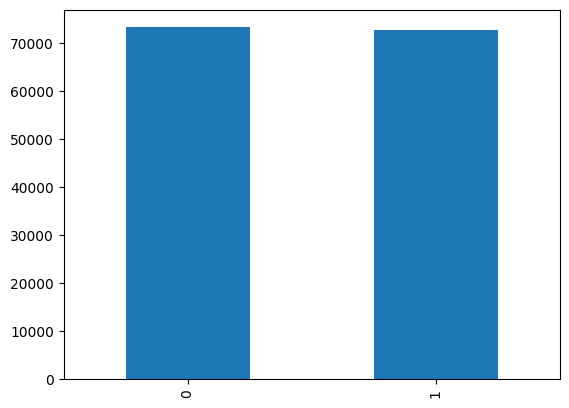

In [109]:
train_data['label'].value_counts().plot(kind = 'bar')  # 0과 1 레이블 값의 개수 분포

In [110]:
print(train_data.groupby('label').size().reset_index(name = 'count'))  # 0과 1 레이블 값의 개수

   label  count
0      0  73342
1      1  72841


In [111]:
print(train_data.isnull().values.any())  # null값의 존재 여부 확인

True


In [112]:
print(train_data.isnull().sum())  # null 값의 열 확인

id          0
document    1
label       0
dtype: int64


In [113]:
train_data.loc[train_data.document.isnull()]  # null 값의 인덱스 위치 확인

,id,document,label
25857,2172111,NaN,1


In [114]:
train_data = train_data.dropna(how = 'any') # null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # null 값이 존재하는지 확인

False


In [115]:
print(len(train_data)) # null 값을 제거한 train data의 개수 확인 (1개 사라짐)

146182


In [66]:
#알파벳과 공백을 제외하고 모두 제거
eng_text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-Z ]', '', eng_text))

do you expect people to read the FAQ etc and actually accept hard atheism


In [116]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]
# 한글과 공백을 제외하고 모두 제거

<ipython-input-116-4cfa178122ce>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [117]:
train_data['document'] = train_data['document'].str.replace('^ +', "") # 공백만 있거나 빈 값이 있는 데이터를 null data로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())  # null 값이 존재하는 지 확인

<ipython-input-117-c207239b4bfc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', "") # 공백만 있거나 빈 값이 있는 데이터를 null data로 변경


id            0
document    789
label         0
dtype: int64


In [118]:
train_data.loc[train_data.document.isnull()][:5]  # 5개의 null 행 출력

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [119]:
train_data = train_data.dropna(how = 'any')  # null data 삭제
print(len(train_data))  # 남은 data의 개수 출력

145393


In [120]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48852


<ipython-input-120-c182d8fa0991>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
<ipython-input-120-c182d8fa0991>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경


In [121]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']
# 불용어를 지정하여 불용어 제거

In [137]:
mecab = Mecab(). # 형태소 분석을 위한 Mecab 사용
mecab.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔')
['와', '이런', '것', '도', '영화', '라고', '차라리', '뮤직', '비디오', '를', '만드', '는', '게', '나을', '뻔']

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

In [130]:
X_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

  0%|          | 0/145393 [00:00<?, ?it/s]


NameError: name 'mecab' is not defined

In [131]:
print(X_train[:3])  # 상위 3개의 샘플 출력

[]


In [132]:
X_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

  0%|          | 0/48852 [00:00<?, ?it/s]


NameError: name 'okt' is not defined

In [134]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)
# training data 중 20%를 validation data로 사용

ValueError: Found input variables with inconsistent numbers of samples: [0, 145393]

In [135]:
print('--------학습 데이터의 비율-----------')
print(f'부정 리뷰 = {round(np.sum(y_train==0)/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(np.count_nonzero(y_train)/len(y_train) * 100,3)}%')
print('--------검증 데이터의 비율-----------')
print(f'부정 리뷰 = {round(np.sum(y_valid==0)/len(y_valid) * 100,3)}%')
print(f'긍정 리뷰 = {round(np.count_nonzero(y_valid)/len(y_valid) * 100,3)}%')
print('--------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(np.sum(y_test==0)/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(np.count_nonzero(y_test)/len(y_test) * 100,3)}%')
# 각 학습 데이터, 검증 데이터, 테스트 데이터에서의 부정 데이터와 긍정 데이터의 비율을 출력

--------학습 데이터의 비율-----------
부정 리뷰 = 50.238%
긍정 리뷰 = 49.762%
--------검증 데이터의 비율-----------


NameError: name 'y_valid' is not defined

In [138]:
word_list = []
for sent in X_train:
    for word in sent:
      word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts)) # 총 단어수 출력

총 단어수 : 0


In [ ]:
print('훈련 데이터에서의 단어 영화의 등장 횟수 :', word_counts['영화'])  # 훈련 데이터에서 '영화'의 등장 횟수 출력
print('훈련 데이터에서의 단어 공감의 등장 횟수 :', word_counts['공감'])  # 훈련 데이터에서 '공감'의 등장 횟수 출력

In [ ]:
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('등장 빈도수 상위 10개 단어')
print(vocab[:10]) # 등장 빈도수 상위 10개의 단어 출력

In [ ]:
threshold = 3
total_cnt = len(word_counts) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거
vocab_size = total_cnt - rare_cnt
vocab = vocab[:vocab_size]
print('단어 집합의 크기 :', len(vocab))

In [ ]:
word_to_index = {}
word_to_index['<PAD>'] = 0  # <PAD>에 0을 지정
word_to_index['<UNK>'] = 1  # <UNK>에 1을 지정

In [ ]:
for index, word in enumerate(vocab) :  # 각 단어에 index를 지정하며 iteration
  word_to_index[word] = index + 2. # 2부터 index를 부여(0, 1은 앞에서 <PAD>와 <UNK>에 지정)

In [ ]:
vocab_size = len(word_to_index)
print('패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 :' vocab_size) # 단어 집합의 크키

In [ ]:
print('단어 <PAD>와 맵핑되는 정수 :', word_to_index['<PAD>'])
print('단어 <UNK>와 맵핑되는 정수 :', word_to_index['<UNK>'])
print('단어 영화와 맵핑되는 정수 :', word_to_index['영화'])
# 각 단어  <PAD>, <UNK>, 영화에 맵핑되는 점수 출력

In [ ]:
def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word]) # 단어가 'word_to_index' dictionary에 존재할 때 해당 index를 append
      except KeyError:
          index_sequences.append(word_to_index['<UNK>']) # 단어가 'word_to_index' dictionary에 존재하지 않을 때 <UNK> index를 append
    encoded_X_data.append(index_sequences)
  return encoded_X_data

In [ ]:
encoded_X_train = texts_to_sequences(X_train, word_to_index)
encoded_X_valid = texts_to_sequences(X_valid, word_to_index)
encoded_X_test = texts_to_sequences(X_test, word_to_index)

In [ ]:
# 상위 샘플 2개 출력
for sent in encoded_X_train[:2]:
  print(sent)

In [ ]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key
    # 인덱스에서 단어를 추출하는 reverse mapping

In [ ]:
decoded_sample = [index_to_word[word] for word in encoded_X_train[0]]
print('기존의 첫번째 샘플 :', X_train[0])
print('복원된 첫번째 샘플 :', decoded_sample)
# 기존의 첫번쨰 샘플과 reverse mapping을 통해 복원된 샘플 출력

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in encoded_X_train))
print('리뷰의 평균 길이 :',sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
# 리뷰의 최대 길이과 평균 길이를 출력

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))
  # 전체 샘플 중 길이가 %s 이하인 샘플의 비율을 출력

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)
# 전체 샘플 중 길이가 30 이하인 샘플의 비율을 출력

In [ ]:
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features
# 문장을 max_len 길에 맞게 자르거나 패딩하고 문장의 길이가 max_len 보다 작다면 뒤에 값을 0으로 채운다.
padded_X_train = pad_sequences(encoded_X_train, max_len=max_len)
padded_X_valid = pad_sequences(encoded_X_valid, max_len=max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len=max_len)

print('훈련 데이터의 크기 :', padded_X_train.shape)
print('검증 데이터의 크기 :', padded_X_valid.shape)
print('테스트 데이터의 크기 :', padded_X_test.shape)

In [ ]:
print('첫번째 샘플의 길이 :', len(padded_X_train[0]))
print('첫번째 샘플 :', padded_X_train[0])
# 첫번째 샘플의 길이와 padded된 데이터를 출력

In [ ]:
# LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("cpu와 cuda 중 다음 기기로 학습함:", device)

In [ ]:
train_label_tensor = torch.tensor(np.array(y_train))
valid_label_tensor = torch.tensor(np.array(y_valid))
test_label_tensor = torch.tensor(np.array(y_test))
print(train_label_tensor[:5])
# 훈련 데이터의 상위 5개의 레이블을 출력

In [ ]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # x: (batch_size, seq_length)
        embedded = self.embedding(x)  # (batch_size, seq_length, embedding_dim)

        # LSTM은 (hidden state, cell state)의 튜플을 반환
        lstm_out, (hidden, cell) = self.lstm(embedded)  # lstm_out: (batch_size, seq_length, hidden_dim), hidden: (1, batch_size, hidden_dim)

        last_hidden = hidden.squeeze(0)  # (batch_size, hidden_dim)
        logits = self.fc(last_hidden)  # (batch_size, output_dim)
        return logits

In [ ]:
encoded_train = torch.tensor(padded_X_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(padded_X_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=1)

encoded_valid = torch.tensor(padded_X_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=1)

In [ ]:
total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))
# 배치 크기를 32로 할 때의 총 배치 수 출력

In [ ]:
embedding_dim = 100
hidden_dim = 128
output_dim = 2
learning_rate = 0.01
num_epochs = 10

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model.to(device)
# 임베딩 벡터의 차원 = 100, LSTM의 은닉층의 크기 = 128, 분류하고자 하는 카테고리 개수 = 2개, learin rate = 0.01, epoch 수 = 10


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# cross entropy function을 이용해 loss 계산
# Adam optimizer를 이용해 parameter 업데이트

In [ ]:
def calculate_accuracy(logits, labels):
    # _, predicted = torch.max(logits, 1)
    predicted = torch.argmax(logits, dim=1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy
# 모델의 정확도를 측정

In [ ]:
def evaluate(model, valid_dataloader, criterion, device):
    val_loss = 0
    val_correct = 0
    val_total = 0
# 검증 데이터와 테스트 데이터에 대한 성능 측정
    model.eval() # 평가모드로 설정
    with torch.no_grad(): # gradient 계산 비활성화
        # 데이터로더로부터 배치 크기만큼의 데이터를 연속으로 로드
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # 모델의 예측값
            logits = model(batch_X)

            # 손실을 계산
            loss = criterion(logits, batch_y)

            # 정확도와 손실을 계산함
            val_loss += loss.item()
            val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
            val_total += batch_y.size(0)

    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_accuracy

In [ ]:
num_epochs = 5
# epoch 수 = 5
# Training loop
best_val_loss = float('inf')
# 초기 손실 무한대로 설정

# Training loop
for epoch in range(num_epochs):
    # Training
    train_loss = 0
    train_correct = 0
    train_total = 0
    model.train()
    for batch_X, batch_y in train_dataloader:
        # Forward pass
        batch_X, batch_y = batch_X.to(device), batch_y.to(device) # batch_X : 입력 데이터, batch_y : 레이블
        # batch_X.shape == (batch_size, max_len)
        logits = model(batch_X)


        loss = criterion(logits, batch_y) # loss 계산


        optimizer.zero_grad() # gradient 초기화
        loss.backward()
        optimizer.step()
        # Backward pass and optimization

        train_loss += loss.item()
        train_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
        train_total += batch_y.size(0)
        # 정확도와 loss 계산

    train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)

    val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)
    # 검증 단계

    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    if val_loss < best_val_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')
    # validation loss가 최소일 때 체크포인트 저장

In [ ]:

model.load_state_dict(torch.load('best_model_checkpoint.pth'))

model.to(device)

In [ ]:

val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')
# validation data에 대한 정확도와 손실 계산

In [ ]:
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')
# test data에 대한 정확도와 손실 계산

In [ ]:
index_to_tag = {0 : '부정', 1 : '긍정'}

def predict(text, model, word_to_index, index_to_tag):
    model.eval() # 평가 모드로 설정

    tokens = mecab.morphs(text)
    tokens = [word for word in tokens if not word in stopwords] # 불용어 제거
    token_indices = [word_to_index.get(token, 1) for token in tokens]
    # input data 토큰화, 텍스트 단어를 인덱스로 변환

    input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)
    # 단어 인덱스를 텐서로 변환 (1, seq_length)

    with torch.no_grad(): # 가중치 업데이트 실행하지 않음
        logits = model(input_tensor)  # 예측값을 계산 (1, output_dim)

    predicted_index = torch.argmax(logits, dim=1) # 예측되는 인덱스 계산


    predicted_tag = index_to_tag[predicted_index.item()] # 예측한 인덱스 값을 해당하는 태그로 변환

    return predicted_tag

In [ ]:
test_input = "이 영화 개꿀잼 ㅋㅋㅋ"
predict(test_input, model, word_to_index, index_to_tag)

In [ ]:
test_input = "이딴게 영화냐 ㅉㅉ"
predict(test_input, model, word_to_index, index_to_tag)

In [ ]:
test_input = "감독 뭐하는 놈이냐?"
predict(test_input, model, word_to_index, index_to_tag)

In [ ]:
test_input = "와 개쩐다 정말 세계관 최강자들의 영화다"
predict(test_input, model, word_to_index, index_to_tag)
# 각 input data에 대해서 긍정 혹은 부정 값을 출력